In [1]:
from PIL import Image

import numpy as np
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os

import warnings
warnings.filterwarnings('ignore')

# Dataset:
+ 40 folders equivalent to 40 distinct people
+ Each folder includes 10 diffents images of one person
+ Image size is 112 x 92 pixel

# Task 1
+ Read image
+ Implement PCA
+ Visual image, eigenface, average face

In [2]:
GALLERY = "/kaggle/input/att-images/ATT images"
## Storing Images and corresponding labels
images = list()
labels = list()
for folder in os.listdir(GALLERY):
    for img in os.listdir(GALLERY + "/" + folder):
        img = Image.open(GALLERY + "/" + folder + "/" + img)
        images.append(np.array(img))

        # folder syntax: 's' + k ,with k is id of person
        labels.append(int(folder.split("s")[1]))

In [3]:
def beautify(ax):
    ax.spines[['top','bottom','left','right']].set_visible(False)
    ax.tick_params(left=False, bottom = False, top=False, right =False)
    ax.set_yticklabels('')
    ax.set_xticklabels('')

def show_all_face_of(id):
    for i in range(len(labels)):
        if labels[i] == id:
            start = i
            break
    person = images[start:start+10]
    f, axs = plt.subplots(1, 10, figsize=(10, 10))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(person, axs)):
        ax.imshow(img, cmap="gray")
        beautify(ax)
    plt.show()

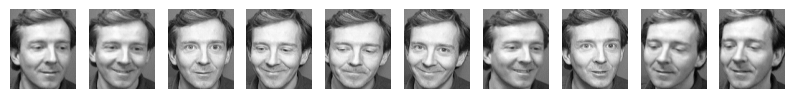

In [4]:
show_all_face_of(3)

In [5]:
# Prepare X, y for model
shape = images[0].shape
X = np.resize(images,(len(images), shape[0]*shape[1]))
y = np.array(labels).reshape(-1,1)
y.shape

(400, 1)

In [6]:
# Split data ( stratify - y assure that train/test ratio (7/3) is true for each person)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (280, 10304)
y_train shape: (280, 1)


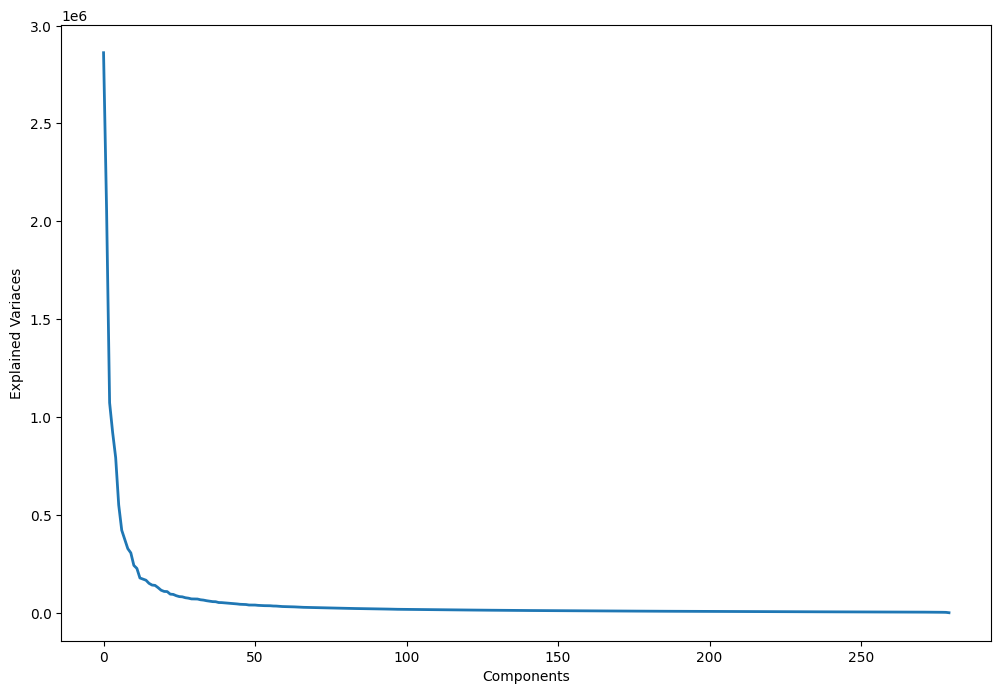

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)  
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

Từ hình trên sẽ def cái hàm để chọn n_components tối nhất, ở đây đang dùng 50. Emplement lại PCA với parameter

In [8]:
n_components=50
pca=PCA(n_components=n_components, whiten=True, svd_solver='auto') # xem para svd_solver là gì
pca.fit(X_train)

PCA(n_components=50, whiten=True)

Text(0.5, 1.0, 'Average Face')

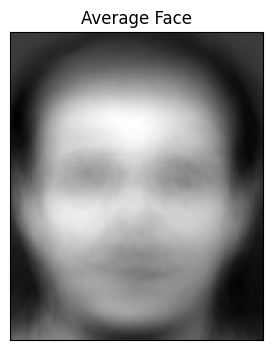

In [9]:
# viusalize Mean của toàn bộ tập train
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(pca.mean_.reshape((shape[0],shape[1])), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

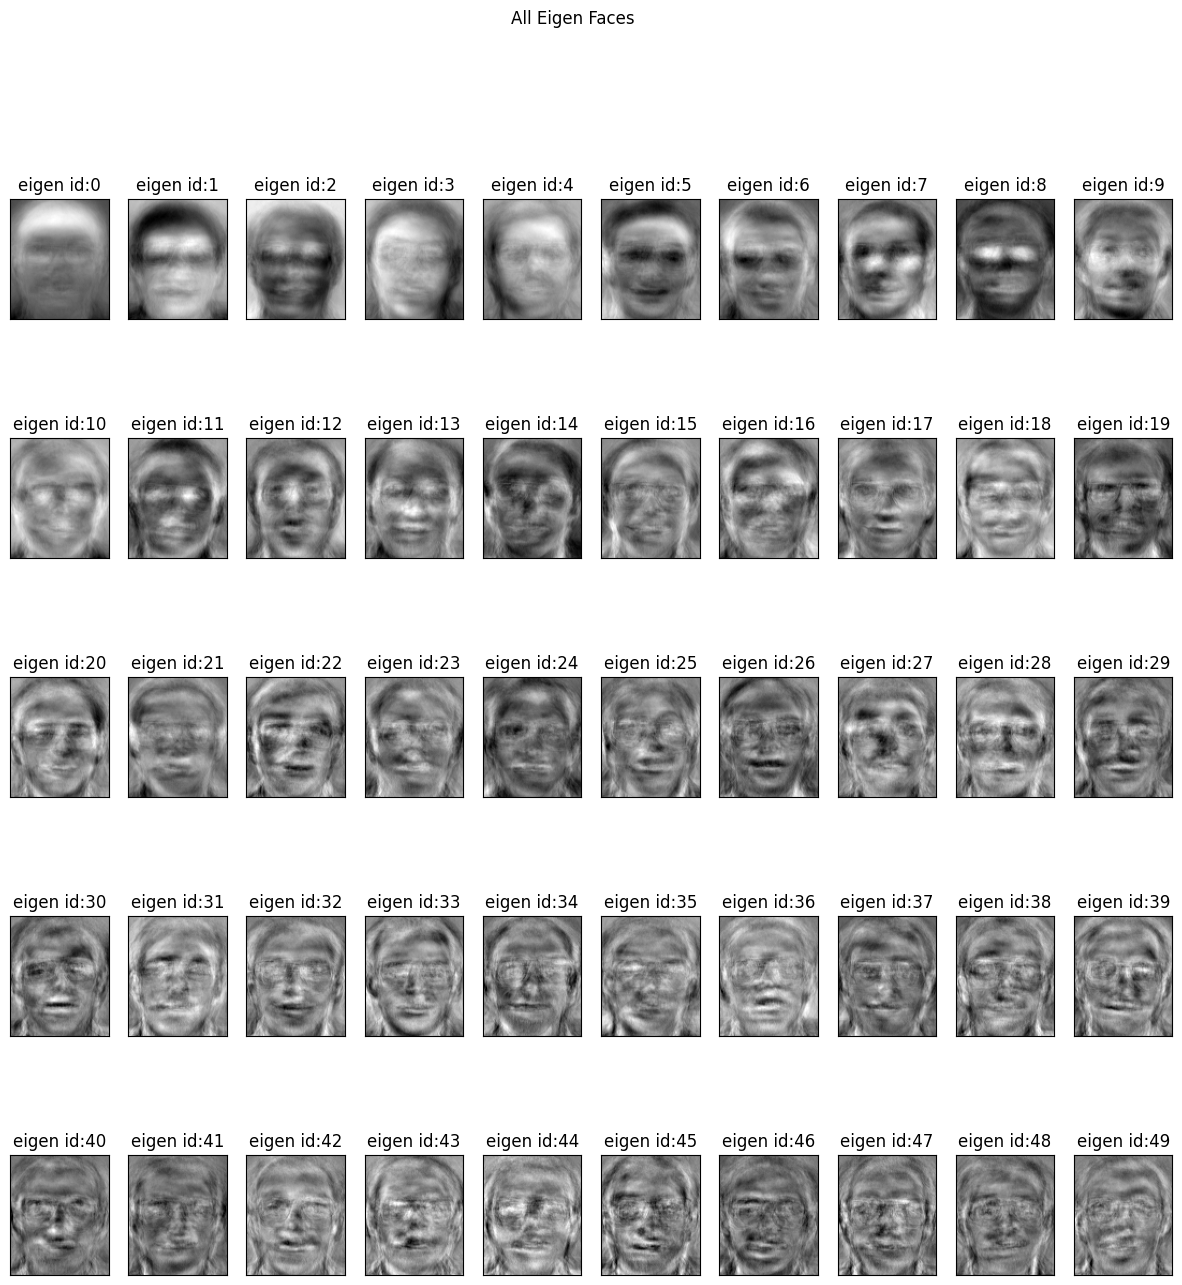

In [10]:
# Visualize eigenface
eigenfaces = pca.components_.reshape(n_components,shape[0],shape[1]) #90x112x92

cols=10
rows=int(n_components/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(n_components):
    axarr[i].imshow(eigenfaces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [11]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

# Task 2
+ Try Incremental PCA, Kernel PCA, LLE
+ Implement Euclide distance for task 1, try other classification method 
+ Tunning parameter

# Cross Validation

In [12]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN (euclide)",KNeighborsClassifier(n_neighbors=1, metric= 'euclidean')))
models.append(("KNN (manhattan)",KNeighborsClassifier(n_neighbors=5, metric='manhattan')))
models.append(("KNN (minkowski)",KNeighborsClassifier(n_neighbors=5, metric='minkowski')))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)

In [13]:
# K-fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, labels, cv=kfold)
    print("{} K-fold mean cross validations score: {:.2f}".format(name, cv_scores.mean()))

LDA K-fold mean cross validations score: 0.99
LR K-fold mean cross validations score: 0.95
NB K-fold mean cross validations score: 0.88
KNN (euclide) K-fold mean cross validations score: 0.93
KNN (manhattan) K-fold mean cross validations score: 0.85
KNN (minkowski) K-fold mean cross validations score: 0.85
DT K-fold mean cross validations score: 0.60
SVM K-fold mean cross validations score: 0.96


In [14]:
# Leave One Out 
from sklearn.model_selection import LeaveOneOut

for name, model in models:
    loo_cv=LeaveOneOut()
    cv_scores=cross_val_score(model, X_pca, labels, cv=loo_cv)
    print("{} LOO mean cross validations score: {:.2f}".format(name, cv_scores.mean()))

LDA LOO mean cross validations score: 0.99
LR LOO mean cross validations score: 0.97
NB LOO mean cross validations score: 0.93
KNN (euclide) LOO mean cross validations score: 0.94
KNN (manhattan) LOO mean cross validations score: 0.92
KNN (minkowski) LOO mean cross validations score: 0.91
DT LOO mean cross validations score: 0.69
SVM LOO mean cross validations score: 0.97


+ Dễ thấy score LOO > K-fold
+ Ranking classifier model: LDA -> LR -> SVC -> NB -> KNN -> DT

# Tunning

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Cho logistic Regression

# params={
#         'penalty':['l1', 'l2'],
#         'C':np.logspace(0, 4, 10)
#         }
# clf=LogisticRegression()
# loo_cv=LeaveOneOut()
# gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
# gridSearchCV.fit(X_train_pca, y_train)
# print("Grid search fitted..")
# print(gridSearchCV.best_params_)
# print(gridSearchCV.best_score_)
# print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))

In [17]:
# Cho Linear Discre Analyst


# Build Pipeline

In [18]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('lda',  LinearDiscriminantAnalysis()),\
    ('logReg', LogisticRegression(C=2.7825594022071245, penalty="l2")),\
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
   

In [19]:
def evaluate(X_train, X_test, y_train, y_test, dim_red_method, method_name):

    #Transform  input
    dim_red_method.fit(X_train)
    dim_red_method.fit(X_test)
    X_train = dim_red_method.transform(X_train)
    X_test = dim_red_method.transform(X_test)

    # LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred_lda = lda.predict(X_test)

    # Logistic Regression
    lr = LogisticRegression(C=2.7825594022071245, penalty="l2")

    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)


    # Combined 
    pipeline = Pipeline([
        ('lda',  lda),\
        ('logreg', lr),\
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Validation on test set
    acc = {'LDA': metrics.accuracy_score(y_test, y_pred_lda),\
        'LR' : metrics.accuracy_score(y_test, y_pred_lr),\
            'Combined' : metrics.accuracy_score(y_test, y_pred)
    }

    return pd.DataFrame.from_dict(acc, orient='index',columns=[method_name])


In [20]:
from sklearn.decomposition import PCA
record = pd.DataFrame(index=['LDA','LR','Combined'])

for i in range(35,65):
    model = PCA(n_components=i, whiten=True, svd_solver='auto')                      
    ans = evaluate(X_train, X_test, y_train, y_test, model, str(model))
    record = pd.concat([record,ans],axis=1)
record.T

,LDA,LR,Combined
"PCA(n_components=35, whiten=True)",0.975000,0.950000,0.975000
"PCA(n_components=36, whiten=True)",0.983333,0.966667,0.983333
"PCA(n_components=37, whiten=True)",0.983333,0.941667,0.966667
"PCA(n_components=38, whiten=True)",0.983333,0.941667,0.983333
"PCA(n_components=39, whiten=True)",0.966667,0.933333,0.975000
"PCA(n_components=40, whiten=True)",0.991667,0.958333,0.975000
"PCA(n_components=41, whiten=True)",0.983333,0.950000,0.975000
"PCA(n_components=42, whiten=True)",0.983333,0.941667,0.975000
"PCA(n_components=43, whiten=True)",0.991667,0.933333,0.983333
"PCA(n_components=44, whiten=True)",0.991667,0.950000,0.975000


In [21]:
from sklearn.decomposition import IncrementalPCA

record = pd.DataFrame(index=['LDA','LR','Combined'])
for i in range(35,66):
    model = IncrementalPCA(n_components=i)                    
    ans = evaluate(X_train, X_test, y_train, y_test, model, str(model))
    record = pd.concat([record,ans],axis=1)
record.T

,LDA,LR,Combined
IncrementalPCA(n_components=35),0.983333,0.983333,0.983333
IncrementalPCA(n_components=36),0.983333,0.975000,0.983333
IncrementalPCA(n_components=37),0.975000,0.975000,0.966667
IncrementalPCA(n_components=38),0.975000,0.975000,0.975000
IncrementalPCA(n_components=39),0.983333,0.975000,0.975000
IncrementalPCA(n_components=40),0.975000,0.975000,0.975000
IncrementalPCA(n_components=41),0.983333,0.975000,0.975000
IncrementalPCA(n_components=42),0.983333,0.966667,0.975000
IncrementalPCA(n_components=43),0.991667,0.966667,0.983333
IncrementalPCA(n_components=44),0.991667,0.983333,0.983333


In [22]:
from sklearn.decomposition import KernelPCA

record = pd.DataFrame(index=['LDA','LR','Combined'])
for i in range(35,66):
    model = KernelPCA(n_components=i)                  
    ans = evaluate(X_train, X_test, y_train, y_test, model, str(model))
    record = pd.concat([record,ans],axis=1)
record.T

,LDA,LR,Combined
KernelPCA(n_components=35),0.983333,0.983333,0.983333
KernelPCA(n_components=36),0.983333,0.975000,0.983333
KernelPCA(n_components=37),0.975000,0.975000,0.966667
KernelPCA(n_components=38),0.975000,0.975000,0.975000
KernelPCA(n_components=39),0.983333,0.975000,0.975000
KernelPCA(n_components=40),0.975000,0.975000,0.975000
KernelPCA(n_components=41),0.983333,0.975000,0.975000
KernelPCA(n_components=42),0.983333,0.966667,0.975000
KernelPCA(n_components=43),0.991667,0.966667,0.983333
KernelPCA(n_components=44),0.991667,0.975000,0.983333


In [23]:
from sklearn.manifold import LocallyLinearEmbedding

record = pd.DataFrame(index=['LDA','LR','Combined'])
for i in range(60,90):
    model = LocallyLinearEmbedding(n_components=i)       
    ans = evaluate(X_train, X_test, y_train, y_test, model, str(model))
    record = pd.concat([record,ans],axis=1)
record.T

,LDA,LR,Combined
LocallyLinearEmbedding(n_components=60),0.958333,0.950000,0.958333
LocallyLinearEmbedding(n_components=61),0.958333,0.950000,0.958333
LocallyLinearEmbedding(n_components=62),0.958333,0.941667,0.966667
LocallyLinearEmbedding(n_components=63),0.958333,0.950000,0.966667
LocallyLinearEmbedding(n_components=64),0.950000,0.950000,0.966667
LocallyLinearEmbedding(n_components=65),0.950000,0.941667,0.966667
LocallyLinearEmbedding(n_components=66),0.950000,0.941667,0.958333
LocallyLinearEmbedding(n_components=67),0.950000,0.941667,0.958333
LocallyLinearEmbedding(n_components=68),0.941667,0.941667,0.958333
LocallyLinearEmbedding(n_components=69),0.941667,0.950000,0.950000


In [34]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

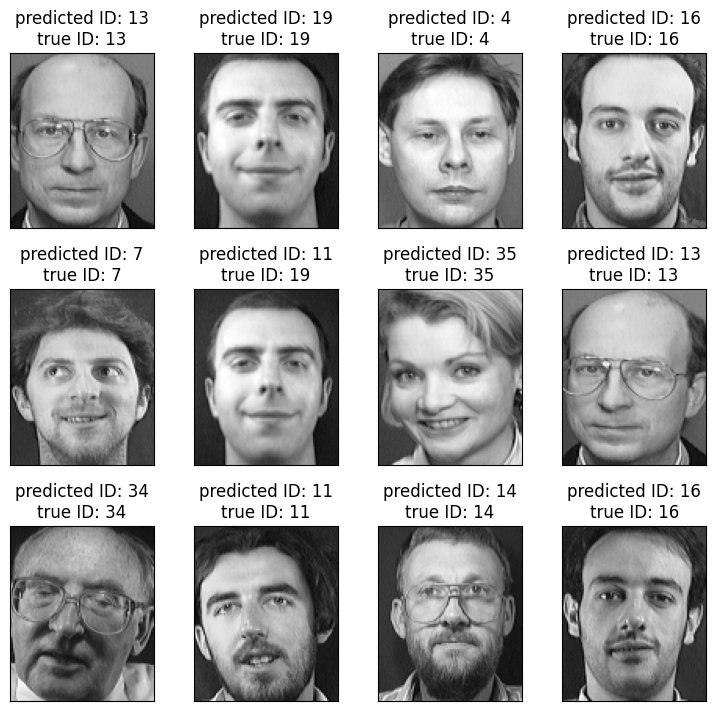

In [35]:
def title(y_pred, y_test, i):
    pred_id = y_pred[i]
    true_id = y_test[i]
    return 'predicted ID: %d\ntrue ID: %d' % (pred_id, true_id)

prediction_titles = [title(y_pred, y_test, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, 112, 92)

Incremental PCA with 61 principal components give the best performance